## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import mean_squared_error

## Load the data

In [2]:
DAILY_PATH = "day.csv"
HOURLY_PATH = "hour.csv"

daily_raw = pd.read_csv(DAILY_PATH)
hourly_raw = pd.read_csv(HOURLY_PATH)

## Exploring the data

In [3]:
hourly_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hourly_raw.shape

(17379, 17)

In [5]:
hourly_raw.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
hourly_raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


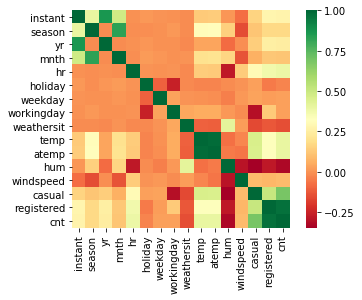

In [7]:
sn.heatmap(hourly_raw.corr(), square=True, cmap='RdYlGn')

In [8]:
hourly_raw.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Data Visualization

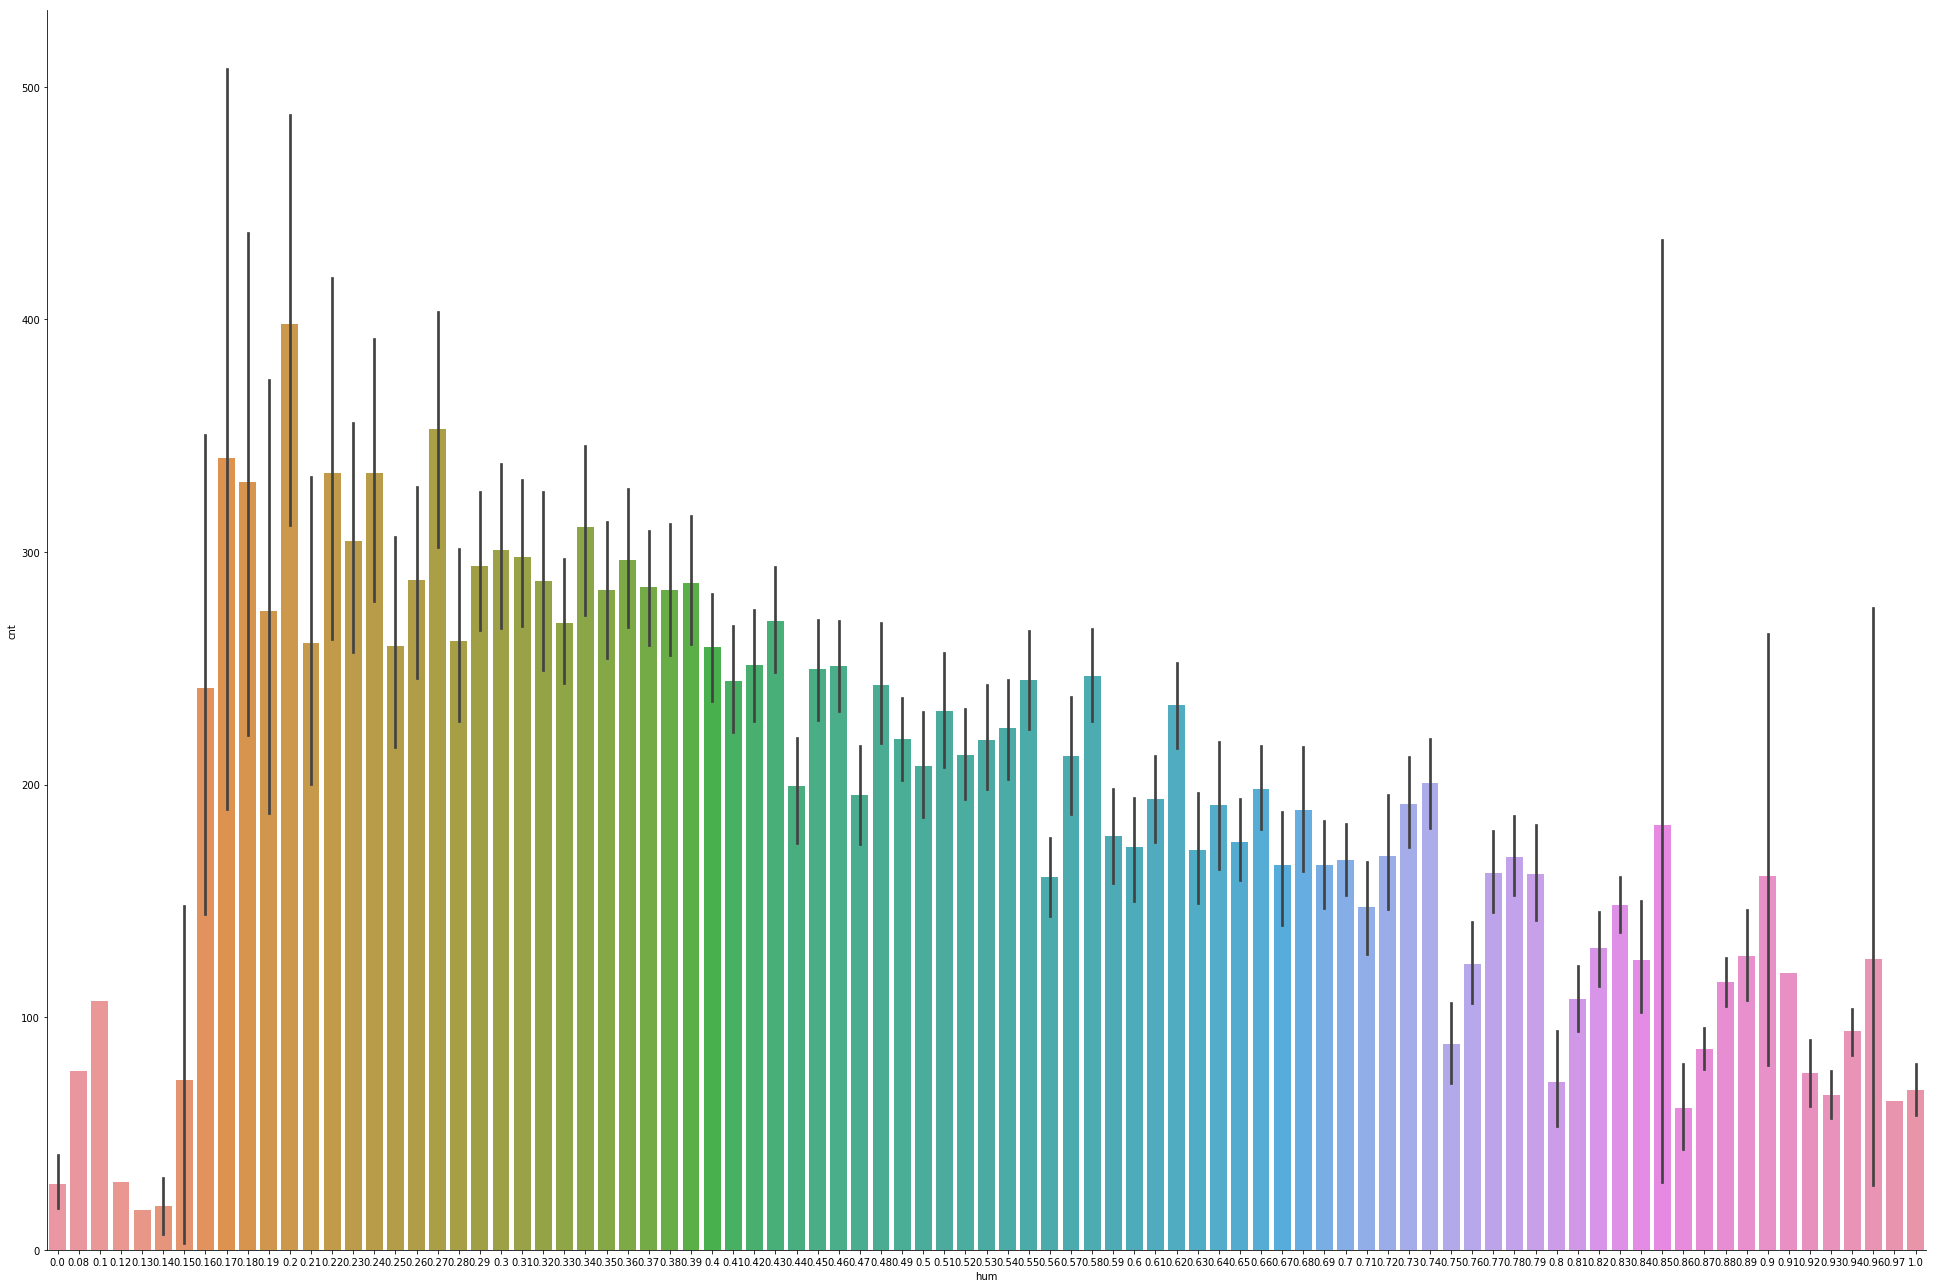

In [9]:
sn.factorplot(x="hum",y="cnt",data=hourly_raw,kind='bar',size=18,aspect=1.5)

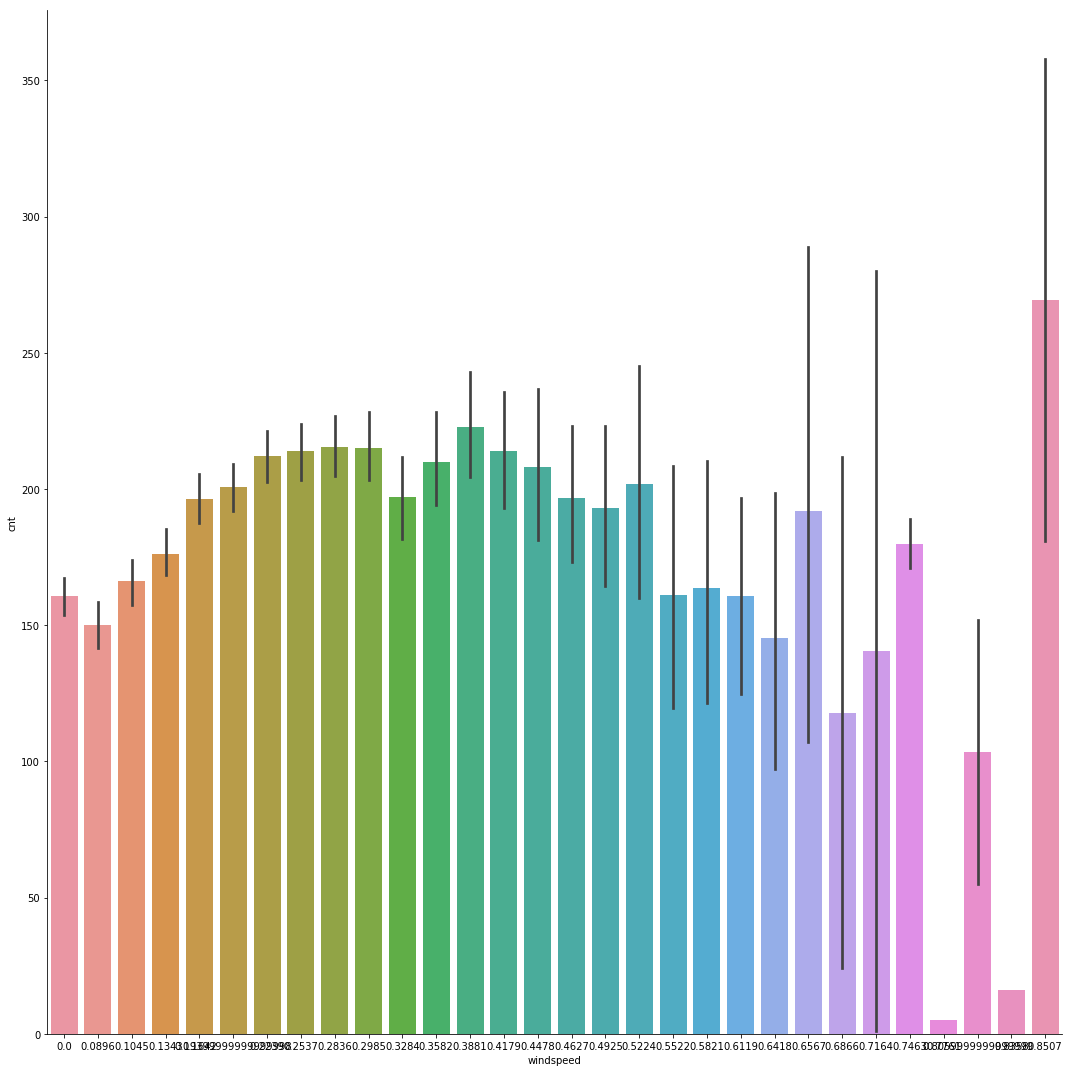

In [41]:
sn.factorplot(x="windspeed",y="cnt",data=hourly_raw,kind='bar',size=15,aspect=1)

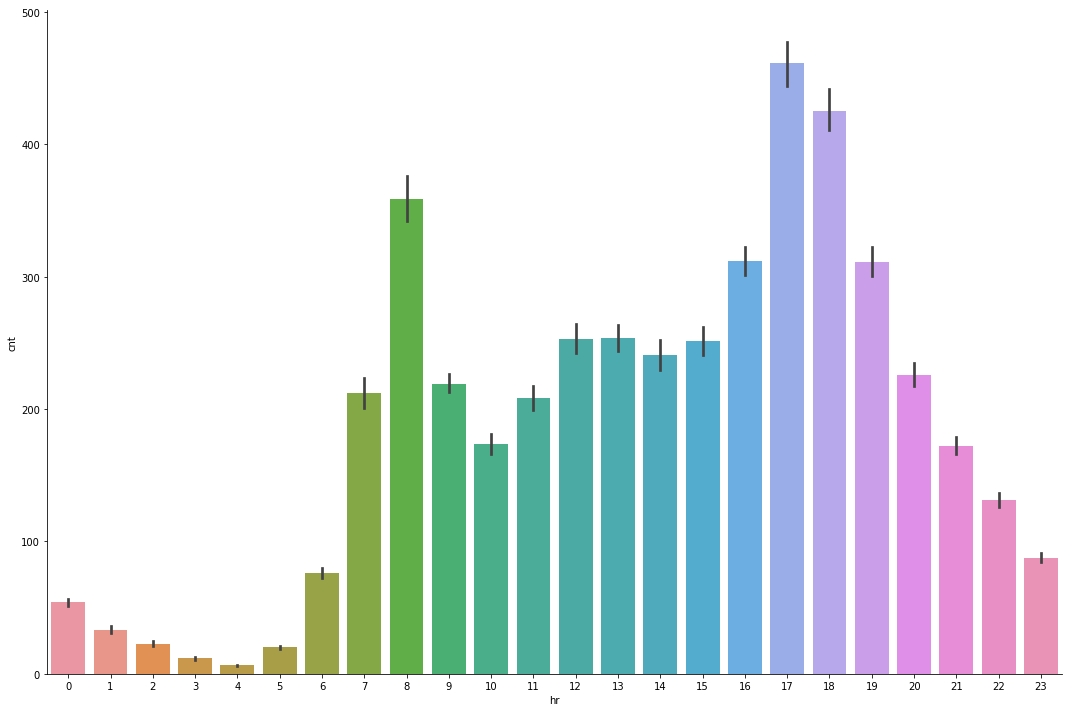

In [11]:
sn.factorplot(x="hr",y="cnt",data=hourly_raw, kind='bar',size=10,aspect=1.5)

In [43]:
hourly_raw["season"] = hourly_raw.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

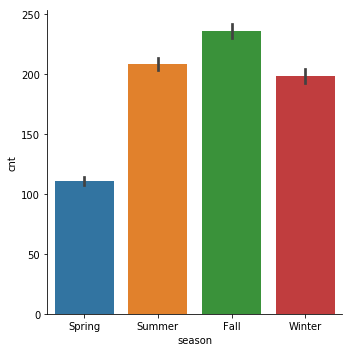

In [44]:
sn.factorplot(x="season",y="cnt",data=hourly_raw,kind='bar',size=5,aspect=1)

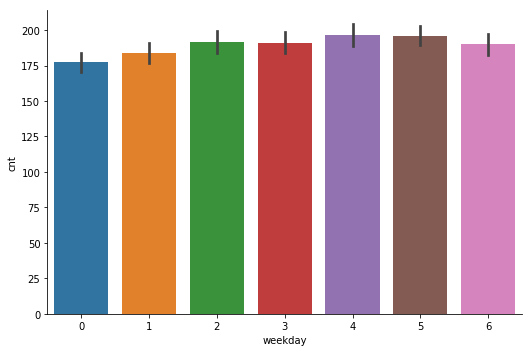

In [13]:
sn.factorplot(x="weekday",y="cnt",data=hourly_raw,kind='bar',size=5,aspect=1.5)

In [45]:
hourly_raw["yr"] = hourly_raw.yr.map({0: "2011", 1 : "2012" })

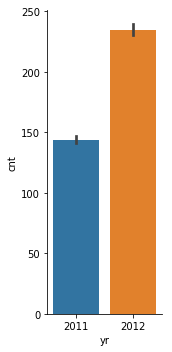

In [48]:
sn.factorplot(x="yr",y="cnt",data=hourly_raw,kind='bar',size=5,aspect=0.5)

In [49]:
hourly_raw["weekday"] = hourly_raw.holiday.map({0: "holiday", 1 : "not holiday" })

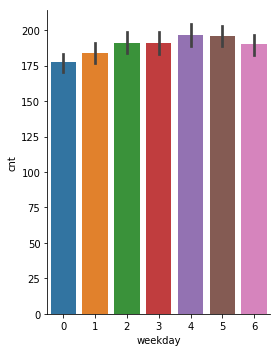

In [57]:
sn.factorplot(x="weekday",y="cnt",data=hourly_raw,kind='bar',size=5,aspect=0.8)

## Preprocessing

### Removing the outliers

In [17]:
def remove_outliers(df):
    """
    Preprocess data by removing the outliers in the target variable that are more than 3 standard deviations
    """
    without_outliers = df[np.abs(df["cnt"]-df["cnt"].mean())<=(3*df["cnt"].std())]

    return without_outliers

without_outliers = remove_outliers(hourly_raw)

In [18]:
print ("Shape Of The Before Ouliers: ", hourly_raw.shape)
print ("Shape Of The After Ouliers: ", without_outliers.shape)

Shape Of The Before Ouliers:  (17379, 17)
Shape Of The After Ouliers:  (17135, 17)


### Update 0s in windspeed

In [19]:
def update_windspeed(df):
    """
    Preprocess data by updating the zero values in windspeed with the mean value
    """
    windspeed_mean = df['windspeed'].mean(skipna=True)
    df['windspeed']=df.windspeed.mask(df.windspeed == 0,windspeed_mean)
    windspeed_update=df
    return  windspeed_update

windspeed_update = update_windspeed(without_outliers)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
def drop_features(df):
    """
    Preprocesses data by converting to categorical variables and dropping features
    """
    category_list = ["weathersit", "hr", "season", "holiday", "mnth", "weekday", "workingday", "yr"]
    for var in category_list:
        df[var] = df[var].astype("category")
    
    DROP_COLUMNS = ["casual", "registered", "dteday", "mnth", "atemp", "instant", "workingday", "windspeed"]
    
    hourly_preprocessed = df.drop(DROP_COLUMNS, axis=1) # 1 means dropping columns
    return hourly_preprocessed

hourly_preprocessed = drop_features(windspeed_update)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Split the data

In [21]:
SEED = 1

In [22]:
hourly_no_target = hourly_preprocessed.drop('cnt', axis=1)
hourly_target = hourly_preprocessed['cnt']

In [23]:
def split_datasets(df):
    """
    Splits the preprocessed dataframe into numpy arrays.
    X_train, y_train, X_test, y_test
    """

    return train_test_split(
        hourly_no_target,
        hourly_target,
        test_size=0.1,
        random_state=SEED)

X_train, X_test, y_train, y_test = split_datasets(hourly_preprocessed)


## Predict with Random Forest

In [24]:
rf = RandomForestRegressor(random_state= SEED)

In [25]:
params_rf = {'n_estimators': [300, 400, 500], 
             'max_features': ['auto']}

In [26]:
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=3, 
                       scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [27]:
grid_rf.fit(X_train, y_train)
    
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)
    
best_model = grid_rf.best_estimator_
# Predict the test set labels

y_pred = best_model.predict(X_test)
# Evaluate the test set RMSE

rmse_test = mean_squared_error(y_test, y_pred)**(1/2)

rmsle_test = mean_squared_log_error(y_test, y_pred)**(1/2)

print('Test set RMSE of rf: {:.2f}'.format(rmse_test)) 
print('Test set RMSLE of rf: {:.2f}'.format(rmsle_test)) 

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.1min finished


Best hyerparameters:
 {'max_features': 'auto', 'n_estimators': 500}
Test set RMSE of rf: 45.46
Test set RMSLE of rf: 0.37


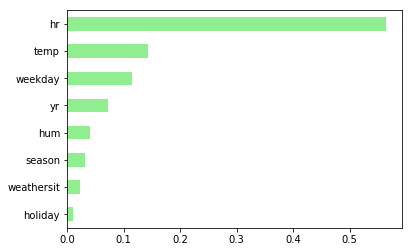

In [28]:
# Create a pd.Series of features importances

importances_rf = pd.Series(best_model.feature_importances_, index = X_train.columns)

# Sort importances_rf

sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

# Learnings 

- Tree based methods can deal with both numerical and categorical variables without having to do one-hot-encoding or normalization

- Drop 'redundant' features (e.g. temp and atemp) was very important for improving the result

- Increase the readability of the codes by defining functions

- Remove outliers from the target variable can eliminate the effect of special circumstances (e.g. sports event) on the bike demands